<!-- Example for now -->
<!-- zelig's code -->
<div style="text-align: center;">
    <h1>Final Project Statistics and Probability</h1>
    <h2>This is a Header 2</h2>
    <h3>This is a Header 3</h3>
    <p><strong>This is bold text</strong></p>
    <p><em>This is italic text</em></p>
    <ul style="list-style-type: none;">
        <li>This is an unordered list item</li>
        <li>Another unordered list item</li>
    </ul>
    <ol>
        <li>This is an ordered list item</li>
        <li>Another ordered list item</li>
    </ol>
</div>

<!-- zelig's -->
# A. Importing Dataset

<!-- zelig's -->
Importing the libraries needed overall.

In [177]:
# zelig's
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset and printing it out raw.

In [178]:
# zelig's
# import the library that can access the user's system
import os

# Get the current working directory
current_working_directory = os.getcwd()

# Define the relative path to the dataset
relative_path_to_dataset = 'data/imdb_top_1000.csv'

# Combine the current working directory with the relative path
full_path_to_dataset = os.path.join(current_working_directory, relative_path_to_dataset)

# print("Full path to dataset:", full_path_to_dataset)

# Load the dataset into a pandas DataFrame
data = pd.read_csv(full_path_to_dataset)

# Print the first few rows of the dataset
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


<!-- zelig's -->
# B. Initial Dataset
Below shall be shown the initial/raw dataset that is yet gone through any processing.

<!-- zelig's -->
Here's a function to print out the dataset with a somewhat better format.

In [179]:
# zelig's
# function on how to print the dataset
def show_df(df, row = 5):
    print(df.head(row), "\n")
    rows, columns = df.shape
    print (f"Amount of rows: {rows}")
    print (f"Amount of columns: {columns}")
    print(f"Columns/categories: {df.columns.tolist()}")
    print(f"Conclusion: the dataset has {rows} rows/movies and {columns} columns/cataegories.")

<!-- zelig's -->
Print out initial/raw dataset with a better format.

In [180]:
# zelig's
# call out the function
show_df(data)

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

<!-- zelig's -->
From the above we could see that there are 16 columns, containing their own data value, which are: 
1. Poster_Link
2. Series_Title
3. Relesed_Year
4. Certificate
5. Runtime
6. Genre
7. IMDB_Rating
8. Overview 
9. Meta_score
10. Director
11. Star1
12. Star2
13. Star3
14. Star4
15. No_of_Votes
16. Gross

<!-- zelig's -->
Looking at the fact that there are many different categories in the dataset, we need to first filter out the data that we can analyze according to many different theories relative to the final project's objective.

Hence, the result of filtering out all of those categories, we're left off with these categories that we can analyze properly to stay objective: 
1. Series_Title
2. Released_Year
3. Certificate
4. Runtime4
5. Genre
6. IMDB_Rating
7. Meta_Score
8. Director
9. Star1
10. Star2
11. Star3
12. Star4
13. No_of_Votes
14. Gross

<!-- zelig's -->
# C. Pre-processing Dataset
For a proper analysis, we need to assure the dataset we have is already proper and have no misses, i.e. there's no null values in them that means it's just an empty row of data with no actual value contained in them. By filtering out the null values in the dataset, we can assure the dataset we have now is proper and of good material for an analysis. By doing this, we have avoided the risk of having an more inaccurate analysis of a dataset, since null values tend to disrupt the actual value the dataset has, and can change the result of counting we do in an analysis. 

**Note: null values are considered empty based on context. Depending on the context of the data, null values can just mean 0 and not empty.**

<!-- zelig's -->
Below is the process of filtering out the dataset from null/empty values.

In [181]:
# zelig's
# Check for zero values in the dataset
zero_values = (data == 0)

# Get the rows and columns that contain zero values
rows_with_zeros, columns_with_zeros = zero_values.any(axis=1), zero_values.any(axis=0)

# Print the columns that contain zero values
if columns_with_zeros.any():
    print("Columns with zero values:")
    for column in data.columns[columns_with_zeros]:
        print(f" - {column}")
else:
    print("No columns with zero values found.")

# Print the rows that contain zero values
if rows_with_zeros.any():
    print("Rows with zero values:")
    for index, row in data[rows_with_zeros].iterrows():
        zero_columns = row[row == 0].index.tolist()
        print(f" - Row {index} has zero values in columns: {zero_columns}")
else:
    print("No rows with zero values found.")

No columns with zero values found.
No rows with zero values found.


<!-- zelig's -->
From the output, we can see that there are no zero values in the dataset. This is good because it means that we don't have to worry about handling zero values in the dataset.

<!-- zelig's -->
After filtering out the zero values in the dataset, what we need to is filter out the dataset that is irrelevant so we can have only the essential data in the dataset we're gonna analyze. Since we can't analyze the Poster_Link and Overview columns/categories, we can just filter them out.

In [182]:
# zelig's
# Drop the 'Poster_Link' and 'Overview' columns
filtered_data = data.drop(columns=['Poster_Link', 'Overview'])

# Save the filtered dataset to a new CSV file
# Replace 'data/imdb_top_1000_filtered.csv' with the desired path for the new file
filtered_data.to_csv('data/imdb_top_1000_filtered.csv', index=False)

# Print the dataset after dropping the columns
show_df(filtered_data)

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  Meta_score              Director  \
0                 Drama          9.3        80.0        Frank Darabont   
1          Crime, Drama          9.2       100.0  Francis Ford Coppola   
2  Action, Crime, Drama          9.0        84.0     Christopher Nolan   
3          Crime, Drama          9.0        90.0  Francis Ford Coppola   
4          Crime, Drama          9.0        96.0          Sidney Lumet   

            Star1           Star2          Star3           Star4  No_of_Votes  \
0     Tim Robbins  Morgan Freeman     Bob Gunton  William Sadler      2343110

<!-- zelig's -->
# D. Data Distribution Analysis
Below shall be where the process of analyzing the data distribution will start.

<!-- zelig's -->
## 1. Formulas Needed for Analyzing
To analyze the dataset from the distribution perspective, we will use several statistical formulas and theories. Below are the list of those formulas.

### a. Sturgess Rule
The Sturgess rule can be used to determine the number of classes there are in a dataset. 

$$
k = 1 + 3.3*log_10(n) 
$$
- $k$ : The Sturgess Value
- $n$ : The amount of data in a dataset

### b. Mean
The mean (average) of a dataset is given by the formula:

$$
\bar{x} = \frac{\sum_{i=1}^{n}{f_{i}x_{i}}}{n}
$$
- $\bar{x}$ : Mean
- $\sum_{i=1}^{n}{f_{i}x_{i}}$ : The sum of frequency*middle point
- $n$ : The amount of data in dataset

### c. Median
The median of a dataset is given by the formula: 

$$ 
Me = L + (\frac{\frac{n}{2} - c}{f})*h
$$
- $Me$ : Median
- $L$ : Lower boundary of the median class
- $c$ : Cumulative frequency up to the class before the median class.
- $f$ : Frequency of the median class
- $h$ : Class interval width

### d. Mode
The mode of a dataset is given by the formula: 

$$
Mo = L + (\frac{f_m - f_1}{(f_m - f_1)+(f_m - f_2)})*h
$$
- $Mo$ : Mode
- $L$ : Lower boundary of the mode class
- $f_m$ : Frequency of the mode class
- $f_1$ : Frequency of the class before the mode class
- $f_2$ : Frequency of the class after the mode class
- $h$ : Class interval width

### e. Mean Deviation
Mean diviation here is good to measure the average deviation of all data points from the mean, disregarding direction. Here is the formula: 

$$
MD = \frac{\sum_{i = 1}^n f_i|x_i - \bar{x}|}{n}
$$
- $MD$ : Mean Deviation
- $n$ : The amount of data in the dataset
- $f_i$ : The frequency of the class in the dataset
- $x_i$ : The middle point of the class in the dataset
- $\bar{x}$ : The mean/average of the data 

### f. Standar Deviation and Variance
Since the dataset we're analyzing counts as a **sample** (Top 1000 IMDB Movies Rating) instead of a population (all the movies worldwide), we're gonna be using the formula for sample datasets:

$$
\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} f_i(x_i - \bar{x})^2} 
$$
- $\sigma$ : Standar Deviation
- $\sigma^2$ : Variance
- $n$ : The amount of data in the dataset
- $f_i$ : The frequency of the class in the dataset
- $x_i$ : The middle point of the class in the dataset
- $\bar{x}$ : The mean/average of the data 


The standard deviation is given by:


### Linear Regression

The equation for a simple linear regression line is:

$$
y = mx + b
$$

where:
- $y$ is the dependent variable
- $x$ is the independent variable
- $m$ is the slope of the line
- $b$ is the y-intercept

### Hypothesis Testing

For hypothesis testing, we use the following null and alternative hypotheses:

- Null hypothesis ($H_0$): $\mu = \mu_0$
- Alternative hypothesis ($H_1$): $\mu \neq \mu_0$

The test statistic is calculated as:

$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

where:
- $\bar{x}$ is the sample mean
- $\mu_0$ is the population mean under the null hypothesis
- $s$ is the sample standard deviation
- $n$ is the sample size


<!-- zelig's -->
## 2. Analysis
First of all we need to check what distribution of the data the we can check form the dataset. Hence, below is a list of all of the distribution that we can analyze from the dataset:

a. Distribution of the IMDB_Rating relative to its frequency

b. Distribution of the Meta_Score relative to its frequency

c. Distribution of Directors relative to all of the directors inside the dataset

d. Distribution of Artists relative to all of the artists inside the dataset

e. Distribution of Certificates relative to all of the movie certificates 

f. Distribution of the Number_of_Votes relative to its frequency

g. Distribution of the Gross relative to its frequency


<!-- zelig's -->
### a. Distribution of the IMDB_Rating relative to its frequency

In [183]:
# zelig's
#using the sturgess rule to determine the number of classes for the distribution table
def sturgess_rule(data):
    n = data.shape[0]
    k = 1 + 3.3 * np.log10(n)
    k = int(np.ceil(k))
    return k

# Calculate the number of bins using Sturges' rule
number_of_classes = sturgess_rule(filtered_data)

# Calculate the range of the IMDB_Rating column
IMDB_data_range = filtered_data['IMDB_Rating'].max() - filtered_data['IMDB_Rating'].min()

# Calculate the bin width
IMDB_bin_width = IMDB_data_range / number_of_classes

# Create the bins for the IMDB_Rating column with consistent width
IMDB_bins = np.arange(filtered_data['IMDB_Rating'].min(), filtered_data['IMDB_Rating'].max() + IMDB_bin_width, IMDB_bin_width)

# Adjust the last bin to include the maximum value
IMDB_bins[-1] = filtered_data['IMDB_Rating'].max()

# Categorize the IMDB_Rating values into the specified bins
IMDB_distribution_table = pd.cut(filtered_data['IMDB_Rating'], bins=IMDB_bins, include_lowest=True, right=True)

# Calculate the frequency of each bin
IMDB_frequency = IMDB_distribution_table.value_counts().sort_index()

# Calculate the middle points of the class intervals
IMDB_middle_points = [(interval.left + interval.right) / 2 for interval in IMDB_frequency.index]

# Calculate the middle point times the frequency
IMDB_mp_times_freq = [mp * freq for mp, freq in zip(IMDB_middle_points, IMDB_frequency)]

# Create a DataFrame for the distribution table
IMDB_distribution_df = pd.DataFrame({
    'Class Interval': IMDB_frequency.index,
    'Middle Point (MP)': IMDB_middle_points,
    'Frequency (F)': IMDB_frequency.values,
    'MP * F': IMDB_mp_times_freq
})

# Print the distribution table
print(IMDB_distribution_df)

                Class Interval  Middle Point (MP)  Frequency (F)     MP * F
0   (7.598999999999999, 7.755]             7.6770            280  2149.5600
1               (7.755, 7.909]             7.8320            257  2012.8240
2               (7.909, 8.064]             7.9865            141  1126.0965
3               (8.064, 8.218]             8.1410            194  1579.3540
4               (8.218, 8.373]             8.2955             44   365.0020
5               (8.373, 8.527]             8.4500             51   430.9500
6               (8.527, 8.682]             8.6045             15   129.0675
7               (8.682, 8.836]             8.7590             10    87.5900
8               (8.836, 8.991]             8.9135              3    26.7405
9               (8.991, 9.145]             9.0680              3    27.2040
10                (9.145, 9.3]             9.2225              2    18.4450


<!-- zelig's -->
From the distribution table above we can finally calculate the mean, mode, and median of the data to develop the data analysis better, into the grouped data distribution analysis.

In [184]:
# zelig's
# Counting the mean, median, and mode of the IMDB_Rating column

# Calculate the mean of the IMDB_Rating column
mean = IMDB_distribution_df['MP * F'].sum() / IMDB_distribution_df['Frequency (F)'].sum()
print(f"Mean: {mean}")

# Calculate the median of the IMDB_Rating column
n = IMDB_distribution_df['Frequency (F)'].sum()
cumulative_frequency = IMDB_distribution_df['Frequency (F)'].cumsum()
median_class_index = cumulative_frequency.searchsorted(n / 2, side='right')
L = IMDB_distribution_df['Class Interval'][median_class_index].left - 0.5
c = cumulative_frequency[median_class_index - 1] if median_class_index > 0 else 0
f = IMDB_distribution_df['Frequency (F)'][median_class_index]
h = IMDB_bin_width
median = L + (((n / 2 )- c) / f) * h
print(f"Median: {median}")

# Calculate the mode of the IMDB_Rating column
mode_class_index = IMDB_distribution_df['Frequency (F)'].idxmax()
L = IMDB_distribution_df['Class Interval'][mode_class_index].left - 0.5
f_m = IMDB_distribution_df['Frequency (F)'][mode_class_index]
f_1 = IMDB_distribution_df['Frequency (F)'][mode_class_index - 1] if mode_class_index > 0 else 0
f_2 = IMDB_distribution_df['Frequency (F)'][mode_class_index + 1] if mode_class_index < len(IMDB_distribution_df) - 1 else 0
mode = L + ((f_m - f_1) / ((f_m - f_1) + (f_m - f_2))) * h
print(f"Mode: {mode}")

Mean: 7.952833499999999
Median: 7.387295719844358
Mode: 7.241814281428142


<!-- zelig's -->
Now that we have the mean, median, and mode from the data, we can move on to the next step where we complete the distribution table.

In [185]:
# zelig's 
IMDB_distribution_df['F * |MP - Mean|'] = IMDB_distribution_df['Frequency (F)'] * abs(IMDB_distribution_df['Middle Point (MP)'] - mean)
IMDB_distribution_df['F * (MP - Mean)^2'] = IMDB_distribution_df['Frequency (F)'] * ((IMDB_distribution_df['Middle Point (MP)'] - mean) ** 2)
print(IMDB_distribution_df)

                Class Interval  Middle Point (MP)  Frequency (F)     MP * F  \
0   (7.598999999999999, 7.755]             7.6770            280  2149.5600   
1               (7.755, 7.909]             7.8320            257  2012.8240   
2               (7.909, 8.064]             7.9865            141  1126.0965   
3               (8.064, 8.218]             8.1410            194  1579.3540   
4               (8.218, 8.373]             8.2955             44   365.0020   
5               (8.373, 8.527]             8.4500             51   430.9500   
6               (8.527, 8.682]             8.6045             15   129.0675   
7               (8.682, 8.836]             8.7590             10    87.5900   
8               (8.836, 8.991]             8.9135              3    26.7405   
9               (8.991, 9.145]             9.0680              3    27.2040   
10                (9.145, 9.3]             9.2225              2    18.4450   

    F * |MP - Mean|  F * (MP - Mean)^2  
0         

<!-- zelig's -->
And then we can calculate the mean deviation, standard deviation, and the variance of the distribution table.

In [186]:
# zelig's 

# Calculate the mean deviation of the IMDB_Rating column
IMDB_mean_deviation = IMDB_distribution_df['F * |MP - Mean|'].sum() / IMDB_distribution_df['Frequency (F)'].sum()
print(f"Mean Deviation: {IMDB_mean_deviation}")

# Calculate the standard deviation of the IMDB_Rating column
IMDB_standard_deviation = np.sqrt(IMDB_distribution_df['F * (MP - Mean)^2'].sum() / IMDB_distribution_df['Frequency (F)'].sum())
print(f"Standard Deviation: {IMDB_standard_deviation}")

# Calculate the variance of the IMDB_Rating column
IMDB_variance = IMDB_standard_deviation ** 2
print(f"Variance: {IMDB_variance}")

Mean Deviation: 0.21657517899999998
Standard Deviation: 0.26916473864113416
Variance: 0.07244965652775007


<!-- zelig's -->
#### Visual Presentation
Here we can see the visual presentation of it, so we can see analyze it easier.

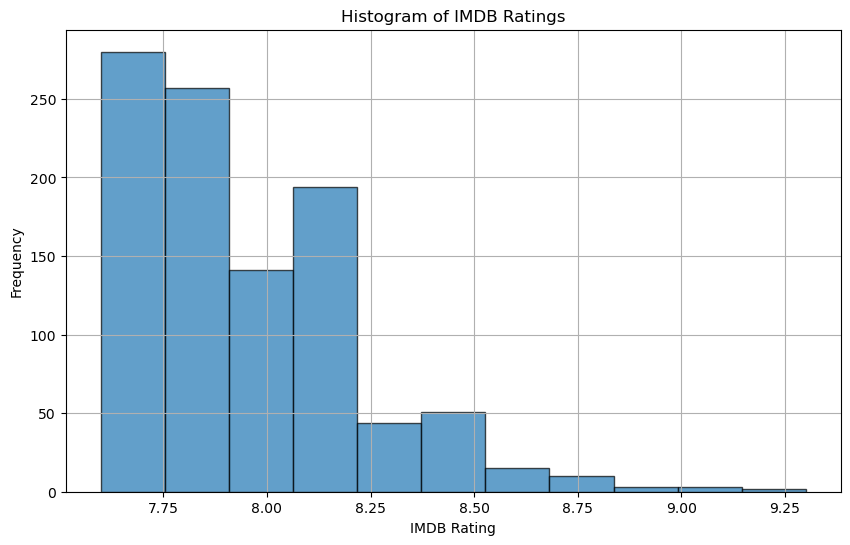

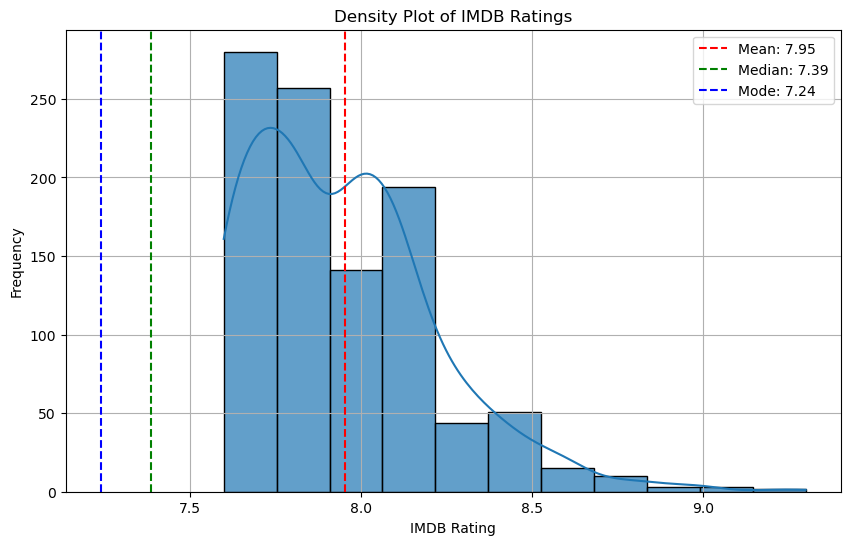

In [187]:
# zelig's
# Plot the histogram of IMDB Ratings
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['IMDB_Rating'], bins=IMDB_bins, edgecolor='black', alpha=0.7)
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.title('Histogram of IMDB Ratings')
plt.grid(True)
plt.show()

# Plot the density plot of IMDB Ratings with mean, median, and mode
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['IMDB_Rating'], bins=IMDB_bins, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(mode, color='b', linestyle='--', label=f'Mode: {mode:.2f}')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.title('Density Plot of IMDB Ratings')
plt.legend()
plt.grid(True)
plt.show()

#### Analysis
So, to sum it up: 
1. Mean: 7.952833499999999
2. Median: 7.387295719844358
3. Mode: 7.241814281428142
4. Mean Deviation: 0.21657517899999998
5. Standard Deviation: 0.26916473864113416
6. Variance: 0.07244965652775007

What we can conclude from the data that we've calculated and from the visualization presentation, is that: 
1. The **IMDB Ratings for the Top 1000 IMDB Rated Movies** are mostly **on the half higher ups of the ratings**, specifically above or equals 7.6 and lower or equals 9.3 ($7.6 \leq$ IMDB Ratings for the Top 1000 IMDB Rated Movies $\leq 9.3$).
2. As what we could see from the data visualization itself, the graph is skewed left (skewed positive). Meaning, the higher the rating goes, the more scarce the movies are. This means IMDB Ratings have a pretty high standard and pretty **accurate to determine the quality of a movie** based on the viewers' satisfaction. 
3. From the low values that mean deviation, standard deviation, and variance has, and from the visualization presentation, we could see that from the Top 1000 IMDB Rated Movies dataset on the IMDB Ratings categories, are mostly grouped up around the mean value, i.e. $\approx 7.95$. This also means the better and easier it is to analyze the trend of Top IMDB Rated Movies, since this **data is considered a good data representation** to see the trend that viewers like to watch.
4. As we can see from the mode and median of the data, that is at the back of the graph itself (from the visualization), we can conclude that all of the Top 1000 IMDB Rated Movies doesn't have any ratings that are lower than 7.6. Why is the mode and median of the dataset are out of the graph itself? It's because most of the data values from the dataset is more grouped to the 7.6 rating. Meaning, we could say that there are way many **more movies** in the Top 1000 IMDB Rated Movies that **are at the borderline of 7.6 rating**.

### b. Distribution of the Meta_Score relative to its frequency

In [188]:
# zelig's
# Calculate the range of the Meta_score column
Meta_data_range = filtered_data['Meta_score'].max() - filtered_data['Meta_score'].min()

# Calculate the bin width
Meta_bin_width = Meta_data_range / number_of_classes

# Create the bins for the Meta_score column with consistent width
Meta_bins = np.arange(filtered_data['Meta_score'].min(), filtered_data['Meta_score'].max() + Meta_bin_width, Meta_bin_width)

# Adjust the last bin to include the maximum value
Meta_bins[-1] = filtered_data['Meta_score'].max()

# Categorize the Meta_score values into the specified bins
Meta_distribution_table = pd.cut(filtered_data['Meta_score'], bins=Meta_bins, include_lowest=True, right=True)

# Calculate the frequency of each bin
Meta_frequency = Meta_distribution_table.value_counts().sort_index()

# Calculate the middle points of the class intervals
Meta_middle_points = [(interval.left + interval.right) / 2 for interval in Meta_frequency.index]

# Calculate the middle point times the frequency
Meta_mp_times_freq = [mp * freq for mp, freq in zip(Meta_middle_points, Meta_frequency)]

# Create a DataFrame for the distribution table
Meta_distribution_df = pd.DataFrame({
    'Class Interval': Meta_frequency.index,
    'Middle Point (MP)': Meta_middle_points,
    'Frequency (F)': Meta_frequency.values,
    'MP * F': Meta_mp_times_freq
})

# Print the distribution table
print(Meta_distribution_df)

      Class Interval  Middle Point (MP)  Frequency (F)      MP * F
0   (27.999, 34.545]            31.2720              3     93.8160
1   (34.545, 41.091]            37.8180              3    113.4540
2   (41.091, 47.636]            44.3635              9    399.2715
3   (47.636, 54.182]            50.9090             22   1119.9980
4   (54.182, 60.727]            57.4545             34   1953.4530
5   (60.727, 67.273]            64.0000             88   5632.0000
6   (67.273, 73.818]            70.5455            125   8818.1875
7   (73.818, 80.364]            77.0910            177  13645.1070
8   (80.364, 86.909]            83.6365            159  13298.2035
9   (86.909, 93.455]            90.1820            137  12354.9340
10   (93.455, 100.0]            96.7275             86   8318.5650


<!-- zelig's -->
From the distribution table above we can finally calculate the mean, mode, and median of the data to develop the data analysis better, into the grouped data distribution analysis.

In [189]:
# zelig's
# Counting the mean, median, and mode of the Meta_score column

# Calculate the mean of the Meta_score column
mean = Meta_distribution_df['MP * F'].sum() / Meta_distribution_df['Frequency (F)'].sum()
print(f"Mean: {mean}")

# Calculate the median of the Meta_score column
n = Meta_distribution_df['Frequency (F)'].sum()
cumulative_frequency = Meta_distribution_df['Frequency (F)'].cumsum()
median_class_index = cumulative_frequency.searchsorted(n / 2, side='right')
L = Meta_distribution_df['Class Interval'][median_class_index].left - 0.5
c = cumulative_frequency[median_class_index - 1] if median_class_index > 0 else 0
f = Meta_distribution_df['Frequency (F)'][median_class_index]
h = Meta_bin_width
median = L + (((n / 2 )- c) / f) * h
print(f"Median: {median}")

# Calculate the mode of the Meta_score column
mode_class_index = Meta_distribution_df['Frequency (F)'].idxmax()
L = Meta_distribution_df['Class Interval'][mode_class_index].left - 0.5
f_m = Meta_distribution_df['Frequency (F)'][mode_class_index]
f_1 = Meta_distribution_df['Frequency (F)'][mode_class_index - 1] if mode_class_index > 0 else 0
f_2 = Meta_distribution_df['Frequency (F)'][mode_class_index + 1] if mode_class_index < len(Meta_distribution_df) - 1 else 0
mode = L + ((f_m - f_1) / ((f_m - f_1) + (f_m - f_2))) * h
print(f"Mode: {mode}")

Mean: 77.99168386714118
Median: 78.40274576271186
Mode: 78.18033766233766


<!-- zelig's -->
Now that we have the mean, median, and mode from the data, we can move on to the next step where we complete the distribution table.

In [190]:
# zelig's 
Meta_distribution_df['F * |MP - Mean|'] = Meta_distribution_df['Frequency (F)'] * abs(Meta_distribution_df['Middle Point (MP)'] - mean)
Meta_distribution_df['F * (MP - Mean)^2'] = Meta_distribution_df['Frequency (F)'] * ((Meta_distribution_df['Middle Point (MP)'] - mean) ** 2)
print(Meta_distribution_df)

      Class Interval  Middle Point (MP)  Frequency (F)      MP * F  \
0   (27.999, 34.545]            31.2720              3     93.8160   
1   (34.545, 41.091]            37.8180              3    113.4540   
2   (41.091, 47.636]            44.3635              9    399.2715   
3   (47.636, 54.182]            50.9090             22   1119.9980   
4   (54.182, 60.727]            57.4545             34   1953.4530   
5   (60.727, 67.273]            64.0000             88   5632.0000   
6   (67.273, 73.818]            70.5455            125   8818.1875   
7   (73.818, 80.364]            77.0910            177  13645.1070   
8   (80.364, 86.909]            83.6365            159  13298.2035   
9   (86.909, 93.455]            90.1820            137  12354.9340   
10   (93.455, 100.0]            96.7275             86   8318.5650   

    F * |MP - Mean|  F * (MP - Mean)^2  
0        140.159052        6548.186582  
1        120.521052        4841.774626  
2        302.653655       10177.6927

<!-- zelig's -->
And then we can calculate the mean deviation, standard deviation, and the variance of the distribution table.

In [191]:
# zelig's 

# Calculate the mean deviation of the Meta_score column
Meta_mean_deviation = Meta_distribution_df['F * |MP - Mean|'].sum() / Meta_distribution_df['Frequency (F)'].sum()
print(f"Mean Deviation: {Meta_mean_deviation}")

# Calculate the standard deviation of the Meta_score column
Meta_standard_deviation = np.sqrt(Meta_distribution_df['F * (MP - Mean)^2'].sum() / Meta_distribution_df['Frequency (F)'].sum())
print(f"Standard Deviation: {Meta_standard_deviation}")

# Calculate the variance of the Meta_score column
Meta_variance = Meta_standard_deviation ** 2
print(f"Variance: {Meta_variance}")

Mean Deviation: 9.914304300716669
Standard Deviation: 12.51144021472902
Variance: 156.53613624673855


<!-- zelig's -->
#### Visual Presentation
Here we can see the visual presentation of it, so we can see analyze it easier.

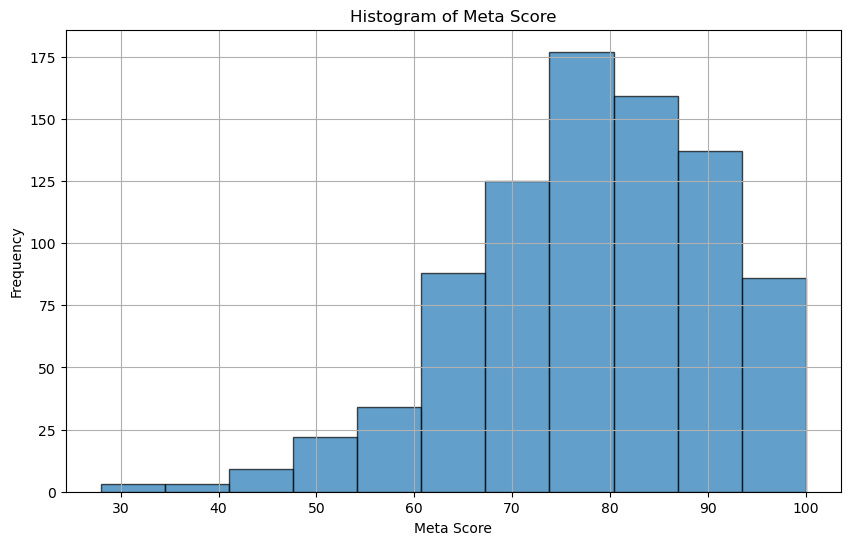

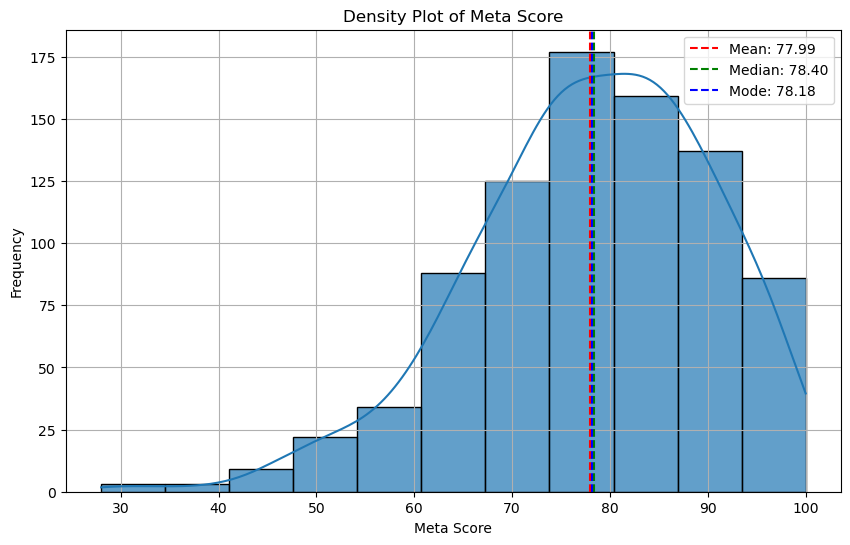

In [192]:
# zelig's
# Plot the histogram of Meta Score
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Meta_score'], bins=Meta_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Meta Score')
plt.ylabel('Frequency')
plt.title('Histogram of Meta Score')
plt.grid(True)
plt.show()

# Plot the density plot of Meta Score with mean, median, and mode
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Meta_score'], bins=Meta_bins, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(mode, color='b', linestyle='--', label=f'Mode: {mode:.2f}')
plt.xlabel('Meta Score')
plt.ylabel('Frequency')
plt.title('Density Plot of Meta Score')
plt.legend()
plt.grid(True)
plt.show()

#### Analysis
So, to sum it up: 
1. Mean: 77.99168386714118
2. Median: 78.40274576271186
3. Mode: 78.18033766233766
4. Mean Deviation: 9.914304300716669
5. Standard Deviation: 12.51144021472902
6. Variance: 156.53613624673855

What we can conclude from the data that we've calculated and from the visualization presentation, is that: 
1. The **Meta Score for the Top 1000 IMDB Rated Movies are evenly distributed**, meaning its data values has a lot of variance. But, we could see from the graph itself it is skewed left (skewed negative), meaning it has scarce meta scores that are on the low end. This means within the Top 1000 IMDB Rated Movies, the meta scores are still mostly on the upper half of meta scores.
2. As what we could see from the data visualization itself, the graph is skewed left (skewed negative). But we could also see that the data are evenly distributed to the right and left (from the mean, median, and mode location, and the shape of the graph), meaning this graph is similar to a symmetric graph but slightly shifted to the right. This means, even though these movies are the Top 1000 IMDB Rated Movies, their **meta scores doesn't fully agree with that**. But, it also doesn't mean that the meta scores fully disagree with it, since most of the meta scores data are on the higher half of the ratings, and even reached the full marks.
3. From the high values that mean deviation, standard deviation, and variance has, and from the visualization presentation, we could see that from the Top 1000 IMDB Rated Movies dataset on the Meta Score categories, are very distributed to the whole graph, form the center to the right and left. This also means this **data is an only ever so slightly good data representation** to determine the trend the Top 1000 IMDB Rated Movies, just for the fact that the graph is shifted more to the right.

### f. Distribution of the Number_of_Votes relative to its frequency

In [199]:
# zelig's
# Calculate the range of the Gross column
Gross_data_range = data['Gross'].max() - data['Gross'].min()

# Calculate the bin width
Gross_bin_width = Gross_data_range / number_of_classes

# Create the bins for the Gross column with consistent width
Gross_bins = np.arange(filtered_data['Gross'].min(), filtered_data['Gross'].max() + Gross_bin_width, Gross_bin_width)

# Adjust the last bin to include the maximum value
Gross_bins[-1] = data['Gross'].max()

# Categorize the Gross values into the specified bins
Gross_distribution_table = pd.cut(filtered_data['Gross'], bins=Gross_bins, include_lowest=True, right=True)

# Calculate the frequency of each bin
Gross_frequency = Gross_distribution_table.value_counts().sort_index()

# Calculate the middle points of the class intervals
Gross_middle_points = [(interval.left + interval.right) / 2 for interval in Gross_frequency.index]

# Calculate the middle point times the frequency
Gross_mp_times_freq = [mp * freq for mp, freq in zip(Gross_middle_points, Gross_frequency)]

# Create a DataFrame for the distribution table
Gross_distribution_df = pd.DataFrame({
    'Class Interval': Gross_frequency.index,
    'Middle Point (MP)': Gross_middle_points,
    'Frequency (F)': Gross_frequency.values,
    'MP * F': Gross_mp_times_freq
})

# Print the distribution table
print(Gross_distribution_df)

TypeError: '>=' not supported between instances of 'str' and 'float'

<!-- zelig's -->
From the distribution table above we can finally calculate the mean, mode, and median of the data to develop the data analysis better, into the grouped data distribution analysis.

In [169]:
# zelig's
# Counting the mean, median, and mode of the Gross column

# Calculate the mean of the Gross column
mean = Gross_distribution_df['MP * F'].sum() / Gross_distribution_df['Frequency (F)'].sum()
print(f"Mean: {mean}")

# Calculate the median of the Gross column
n = Gross_distribution_df['Frequency (F)'].sum()
cumulative_frequency = Gross_distribution_df['Frequency (F)'].cumsum()
median_class_index = cumulative_frequency.searchsorted(n / 2, side='right')
L = Gross_distribution_df['Class Interval'][median_class_index].left - 0.5
c = cumulative_frequency[median_class_index - 1] if median_class_index > 0 else 0
f = Gross_distribution_df['Frequency (F)'][median_class_index]
h = Gross_bin_width
median = L + (((n / 2 )- c) / f) * h
print(f"Median: {median}")

# Calculate the mode of the Gross column
mode_class_index = Gross_distribution_df['Frequency (F)'].idxmax()
L = Gross_distribution_df['Class Interval'][mode_class_index].left - 0.5
f_m = Gross_distribution_df['Frequency (F)'][mode_class_index]
f_1 = Gross_distribution_df['Frequency (F)'][mode_class_index - 1] if mode_class_index > 0 else 0
f_2 = Gross_distribution_df['Frequency (F)'][mode_class_index + 1] if mode_class_index < len(Gross_distribution_df) - 1 else 0
mode = L + ((f_m - f_1) / ((f_m - f_1) + (f_m - f_2))) * h
print(f"Mode: {mode}")

Mean: 302829.18118300004
Median: 190495.09140759244
Mode: 145046.87945332684


<!-- zelig's -->
Now that we have the mean, median, and mode from the data, we can move on to the next step where we complete the distribution table.

In [170]:
# zelig's 
Gross_distribution_df['F * |MP - Mean|'] = Gross_distribution_df['Frequency (F)'] * abs(Gross_distribution_df['Middle Point (MP)'] - mean)
Gross_distribution_df['F * (MP - Mean)^2'] = Gross_distribution_df['Frequency (F)'] * ((Gross_distribution_df['Middle Point (MP)'] - mean) ** 2)
print(Gross_distribution_df)

                Class Interval  Middle Point (MP)  Frequency (F)  \
0      (25087.999, 235817.273]       1.304526e+05            637   
1     (235817.273, 446546.545]       3.411819e+05            155   
2     (446546.545, 657275.818]       5.519112e+05             95   
3     (657275.818, 868005.091]       7.626405e+05             51   
4    (868005.091, 1078734.364]       9.733697e+05             30   
5   (1078734.364, 1289463.636]       1.184099e+06             15   
6   (1289463.636, 1500192.909]       1.394828e+06              5   
7   (1500192.909, 1710922.182]       1.605558e+06              6   
8   (1710922.182, 1921651.455]       1.816287e+06              3   
9   (1921651.455, 2132380.727]       2.027016e+06              1   
10    (2132380.727, 2343110.0]       2.237745e+06              2   

          MP * F  F * |MP - Mean|  F * (MP - Mean)^2  
0   8.309833e+07     1.098039e+08       1.892761e+13  
1   5.288320e+07     5.944673e+06       2.279944e+11  
2   5.243156e+07  

<!-- zelig's -->
And then we can calculate the mean deviation, standard deviation, and the variance of the distribution table.

In [171]:
# zelig's 

# Calculate the mean deviation of the Gross column
Gross_mean_deviation = Gross_distribution_df['F * |MP - Mean|'].sum() / Gross_distribution_df['Frequency (F)'].sum()
print(f"Mean Deviation: {Gross_mean_deviation}")

# Calculate the standard deviation of the Gross column
Gross_standard_deviation = np.sqrt(Gross_distribution_df['F * (MP - Mean)^2'].sum() / Gross_distribution_df['Frequency (F)'].sum())
print(f"Standard Deviation: {Gross_standard_deviation}")

# Calculate the variance of the Gross column
Gross_variance = Gross_standard_deviation ** 2
print(f"Variance: {Gross_variance}")

Mean Deviation: 219607.71856314203
Standard Deviation: 307323.62965407385
Variance: 94447813343.75435


<!-- zelig's -->
#### Visual Presentation
Here we can see the visual presentation of it, so we can see analyze it easier.

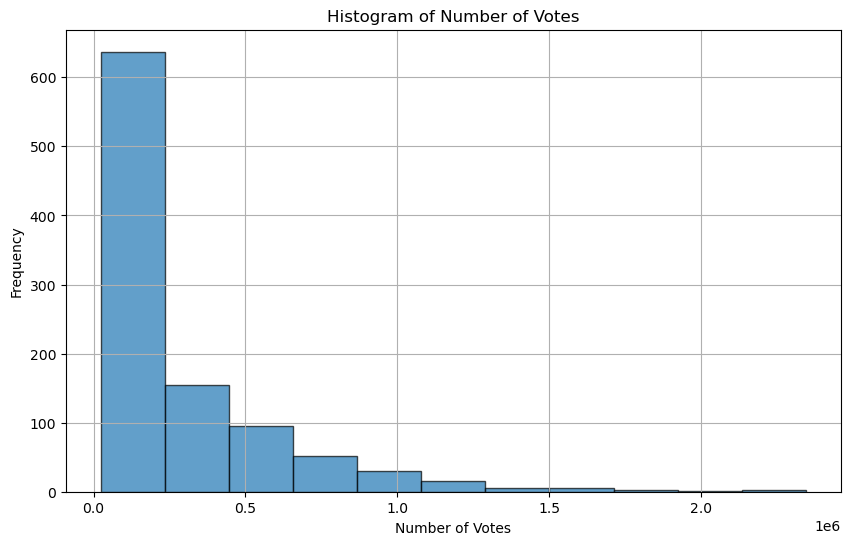

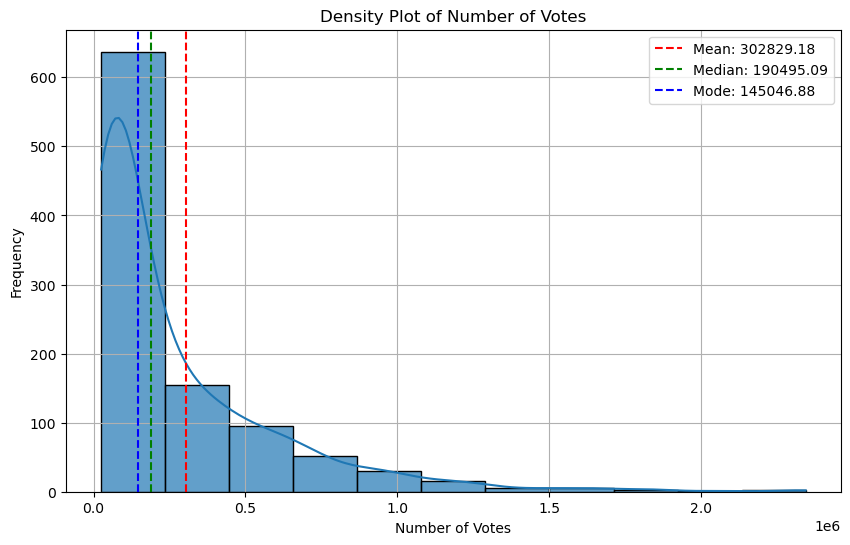

In [172]:
# zelig's
# Plot the histogram of Gross
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Gross'], bins=Votes_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.title('Histogram of Gross')
plt.grid(True)
plt.show()

# Plot the density plot of Gross with mean, median, and mode
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Gross'], bins=Votes_bins, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(mode, color='b', linestyle='--', label=f'Mode: {mode:.2f}')
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.title('Density Plot of Gross')
plt.legend()
plt.grid(True)
plt.show()

#### Analysis
So, to sum it up: 
1. Mean: 302829.18118300004
2. Median: 190495.09140759244
3. Mode: 145046.87945332684
4. Mean Deviation: 219607.71856314203
5. Standard Deviation: 307323.62965407385
6. Variance: 94447813343.75435

What we can conclude from the data that we've calculated and from the visualization presentation, is that: 
1. The **Number of Votes for the Top 1000 IMDB Rated Movies are mostly on the $25,088$ votes $\leq$ Number of Votes $\leq 235,817$ votes** out of a maximum votes that reaches up to $2,343,110$ votes, meaning its data values are very skewed right (skewed positive). The data for number of votes can total up to a very high number, and $\approx 25,000 to \approx 235,000$ of votes can already be counted as a pretty good quantity of reviewers. Even though the data is supposedly on a worldwide level, the quantity itself is already pretty big, hence the credibility of this data can be held pretty credible. Though, for a supposedly worldwide level dataset, this data makes us question the credibility of it.
2. As what we could see from the data visualization itself, the graph is skewed left (skewed positive). Meaning the data is more to the low end, where it's still below 250k of votes. This also means the dataset has scarce enormous quantity of votes that could reach up to milions of votes. In conclusion, this **dataset mostly has quantity of votes from $\approx 25,000 to \approx 235,000$ of votes**
3. This dataset has a big range of variance, meaning the data is more distributed through the whole graph. But, we could see from the mean deviation and standard deviation that the **data is still pretty grouped up around the mean of data**. Meaning, the votes is really grouped up on the low end of the graph. 

### g. Distribution of the Gross relative to its frequency

In [ ]:
# zelig's
# Calculate the range of the No_of_Votes column
Votes_data_range = filtered_data['No_of_Votes'].max() - filtered_data['No_of_Votes'].min()

# Calculate the bin width
Votes_bin_width = Votes_data_range / number_of_classes

# Create the bins for the No_of_Votes column with consistent width
Votes_bins = np.arange(filtered_data['No_of_Votes'].min(), filtered_data['No_of_Votes'].max() + Votes_bin_width, Votes_bin_width)

# Adjust the last bin to include the maximum value
Votes_bins[-1] = data['No_of_Votes'].max()

# Categorize the No_of_Votes values into the specified bins
Votes_distribution_table = pd.cut(filtered_data['No_of_Votes'], bins=Votes_bins, include_lowest=True, right=True)

# Calculate the frequency of each bin
Votes_frequency = Votes_distribution_table.value_counts().sort_index()

# Calculate the middle points of the class intervals
Votes_middle_points = [(interval.left + interval.right) / 2 for interval in Votes_frequency.index]

# Calculate the middle point times the frequency
Votes_mp_times_freq = [mp * freq for mp, freq in zip(Votes_middle_points, Votes_frequency)]

# Create a DataFrame for the distribution table
Votes_distribution_df = pd.DataFrame({
    'Class Interval': Votes_frequency.index,
    'Middle Point (MP)': Votes_middle_points,
    'Frequency (F)': Votes_frequency.values,
    'MP * F': Votes_mp_times_freq
})

# Print the distribution table
print(Votes_distribution_df)

                Class Interval  Middle Point (MP)  Frequency (F)        MP * F
0      (25087.999, 235817.273]       1.304526e+05            637  8.309833e+07
1     (235817.273, 446546.545]       3.411819e+05            155  5.288320e+07
2     (446546.545, 657275.818]       5.519112e+05             95  5.243156e+07
3     (657275.818, 868005.091]       7.626405e+05             51  3.889466e+07
4    (868005.091, 1078734.364]       9.733697e+05             30  2.920109e+07
5   (1078734.364, 1289463.636]       1.184099e+06             15  1.776148e+07
6   (1289463.636, 1500192.909]       1.394828e+06              5  6.974141e+06
7   (1500192.909, 1710922.182]       1.605558e+06              6  9.633345e+06
8   (1710922.182, 1921651.455]       1.816287e+06              3  5.448860e+06
9   (1921651.455, 2132380.727]       2.027016e+06              1  2.027016e+06
10    (2132380.727, 2343110.0]       2.237745e+06              2  4.475491e+06


<!-- zelig's -->
From the distribution table above we can finally calculate the mean, mode, and median of the data to develop the data analysis better, into the grouped data distribution analysis.

In [ ]:
# zelig's
# Counting the mean, median, and mode of the No_of_Votes column

# Calculate the mean of the No_of_Votes column
mean = Votes_distribution_df['MP * F'].sum() / Votes_distribution_df['Frequency (F)'].sum()
print(f"Mean: {mean}")

# Calculate the median of the No_of_Votes column
n = Votes_distribution_df['Frequency (F)'].sum()
cumulative_frequency = Votes_distribution_df['Frequency (F)'].cumsum()
median_class_index = cumulative_frequency.searchsorted(n / 2, side='right')
L = Votes_distribution_df['Class Interval'][median_class_index].left - 0.5
c = cumulative_frequency[median_class_index - 1] if median_class_index > 0 else 0
f = Votes_distribution_df['Frequency (F)'][median_class_index]
h = Votes_bin_width
median = L + (((n / 2 )- c) / f) * h
print(f"Median: {median}")

# Calculate the mode of the No_of_Votes column
mode_class_index = Votes_distribution_df['Frequency (F)'].idxmax()
L = Votes_distribution_df['Class Interval'][mode_class_index].left - 0.5
f_m = Votes_distribution_df['Frequency (F)'][mode_class_index]
f_1 = Votes_distribution_df['Frequency (F)'][mode_class_index - 1] if mode_class_index > 0 else 0
f_2 = Votes_distribution_df['Frequency (F)'][mode_class_index + 1] if mode_class_index < len(Votes_distribution_df) - 1 else 0
mode = L + ((f_m - f_1) / ((f_m - f_1) + (f_m - f_2))) * h
print(f"Mode: {mode}")

Mean: 302829.18118300004
Median: 190495.09140759244
Mode: 145046.87945332684


<!-- zelig's -->
Now that we have the mean, median, and mode from the data, we can move on to the next step where we complete the distribution table.

In [ ]:
# zelig's 
Votes_distribution_df['F * |MP - Mean|'] = Votes_distribution_df['Frequency (F)'] * abs(Votes_distribution_df['Middle Point (MP)'] - mean)
Votes_distribution_df['F * (MP - Mean)^2'] = Votes_distribution_df['Frequency (F)'] * ((Votes_distribution_df['Middle Point (MP)'] - mean) ** 2)
print(Votes_distribution_df)

                Class Interval  Middle Point (MP)  Frequency (F)  \
0      (25087.999, 235817.273]       1.304526e+05            637   
1     (235817.273, 446546.545]       3.411819e+05            155   
2     (446546.545, 657275.818]       5.519112e+05             95   
3     (657275.818, 868005.091]       7.626405e+05             51   
4    (868005.091, 1078734.364]       9.733697e+05             30   
5   (1078734.364, 1289463.636]       1.184099e+06             15   
6   (1289463.636, 1500192.909]       1.394828e+06              5   
7   (1500192.909, 1710922.182]       1.605558e+06              6   
8   (1710922.182, 1921651.455]       1.816287e+06              3   
9   (1921651.455, 2132380.727]       2.027016e+06              1   
10    (2132380.727, 2343110.0]       2.237745e+06              2   

          MP * F  F * |MP - Mean|  F * (MP - Mean)^2  
0   8.309833e+07     1.098039e+08       1.892761e+13  
1   5.288320e+07     5.944673e+06       2.279944e+11  
2   5.243156e+07  

<!-- zelig's -->
And then we can calculate the mean deviation, standard deviation, and the variance of the distribution table.

In [ ]:
# zelig's 

# Calculate the mean deviation of the No_of_Votes column
Votes_mean_deviation = Votes_distribution_df['F * |MP - Mean|'].sum() / Votes_distribution_df['Frequency (F)'].sum()
print(f"Mean Deviation: {Votes_mean_deviation}")

# Calculate the standard deviation of the No_of_Votes column
Votes_standard_deviation = np.sqrt(Votes_distribution_df['F * (MP - Mean)^2'].sum() / Votes_distribution_df['Frequency (F)'].sum())
print(f"Standard Deviation: {Votes_standard_deviation}")

# Calculate the variance of the No_of_Votes column
Votes_variance = Votes_standard_deviation ** 2
print(f"Variance: {Votes_variance}")

Mean Deviation: 219607.71856314203
Standard Deviation: 307323.62965407385
Variance: 94447813343.75435


<!-- zelig's -->
#### Visual Presentation
Here we can see the visual presentation of it, so we can see analyze it easier.

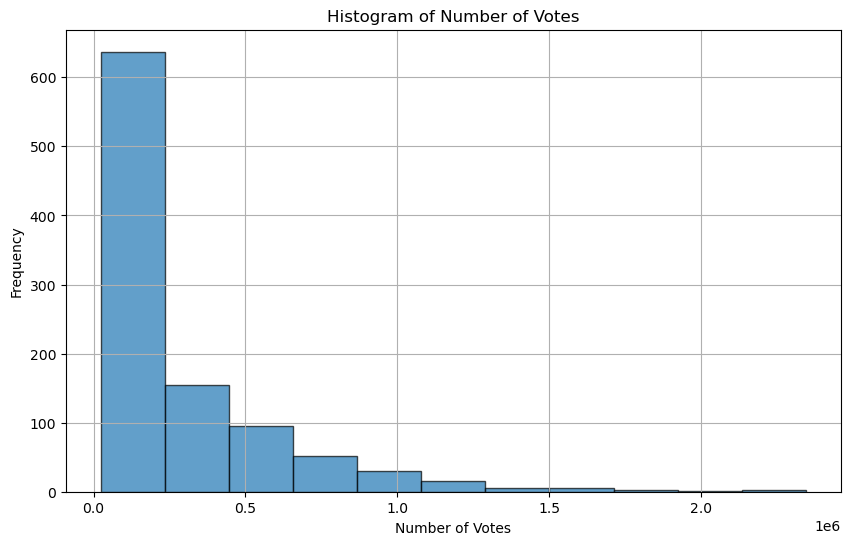

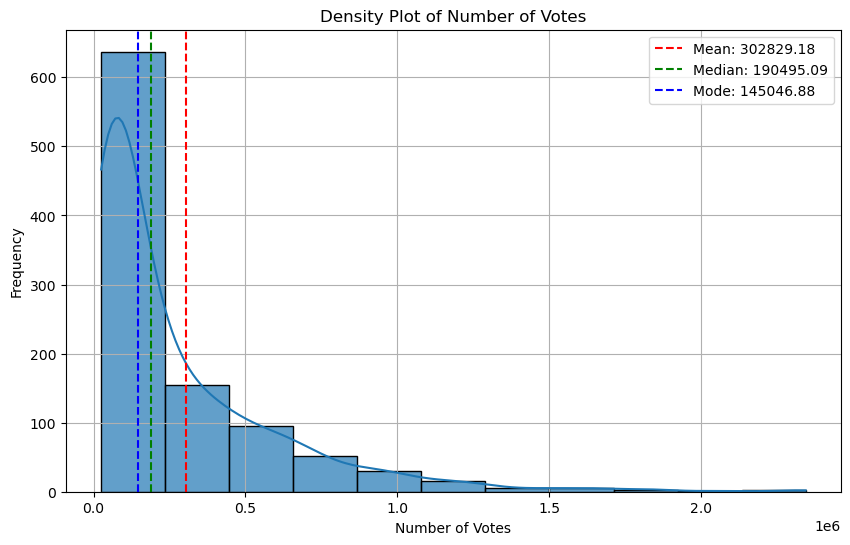

In [ ]:
# zelig's
# Plot the histogram of Number of Votes
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['No_of_Votes'], bins=Votes_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Votes')
plt.grid(True)
plt.show()

# Plot the density plot of Number of Votes with mean, median, and mode
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['No_of_Votes'], bins=Votes_bins, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(mode, color='b', linestyle='--', label=f'Mode: {mode:.2f}')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Density Plot of Number of Votes')
plt.legend()
plt.grid(True)
plt.show()

#### Analysis
So, to sum it up: 
1. Mean: 302829.18118300004
2. Median: 190495.09140759244
3. Mode: 145046.87945332684
4. Mean Deviation: 219607.71856314203
5. Standard Deviation: 307323.62965407385
6. Variance: 94447813343.75435

What we can conclude from the data that we've calculated and from the visualization presentation, is that: 
1. The **Number of Votes for the Top 1000 IMDB Rated Movies are mostly on the $25,088$ votes $\leq$ Number of Votes $\leq 235,817$ votes** out of a maximum votes that reaches up to $2,343,110$ votes, meaning its data values are very skewed right (skewed positive). The data for number of votes can total up to a very high number, and $\approx 25,000 to \approx 235,000$ of votes can already be counted as a pretty good quantity of reviewers. Even though the data is supposedly on a worldwide level, the quantity itself is already pretty big, hence the credibility of this data can be held pretty credible. Though, for a supposedly worldwide level dataset, this data makes us question the credibility of it.
2. As what we could see from the data visualization itself, the graph is skewed left (skewed positive). Meaning the data is more to the low end, where it's still below 250k of votes. This also means the dataset has scarce enormous quantity of votes that could reach up to milions of votes. In conclusion, this **dataset mostly has quantity of votes from $\approx 25,000 to \approx 235,000$ of votes**
3. This dataset has a big range of variance, meaning the data is more distributed through the whole graph. But, we could see from the mean deviation and standard deviation that the **data is still pretty grouped up around the mean of data**. Meaning, the votes is really grouped up on the low end of the graph. 

In [173]:
# analisis koreali data (irul)

Analisis Korelasi,
menggunakan beberapa kolom yang relevan, seperti:
1. IMDB_Rating
2. Meta_score
3. No_of_Votes
4. Gross (pendapatan film)
5. Runtime

sebelum dianalisis, kolom Gross perlu diubah ke dalam format numerik agar dapat dianalisis dan mendapatkan nilai dari setiap kolom runtime.
Berikut adalah data yang sudah diformatkan dan dianaliskan korelasinya:

In [174]:
#analisis korelasi data (irul)
data['Gross'] = data['Gross'].replace(',', '', regex=True).replace('None', None).astype(float)
data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)

numeric_data = data[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']]
correlation_matrix = numeric_data.corr()

correlation_matrix

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jonat\AppData\Local\Temp\ipykernel_11224\4252971347.py:3: SyntaxWarning: invalid escape sequence '\d'
  data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)


,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime
IMDB_Rating,1.000000,0.268531,0.494979,0.095923,0.243096
Meta_score,0.268531,1.000000,-0.018507,-0.030587,-0.031452
No_of_Votes,0.494979,-0.018507,1.000000,0.574393,0.173264
Gross,0.095923,-0.030587,0.574393,1.000000,0.139671
Runtime,0.243096,-0.031452,0.173264,0.139671,1.000000


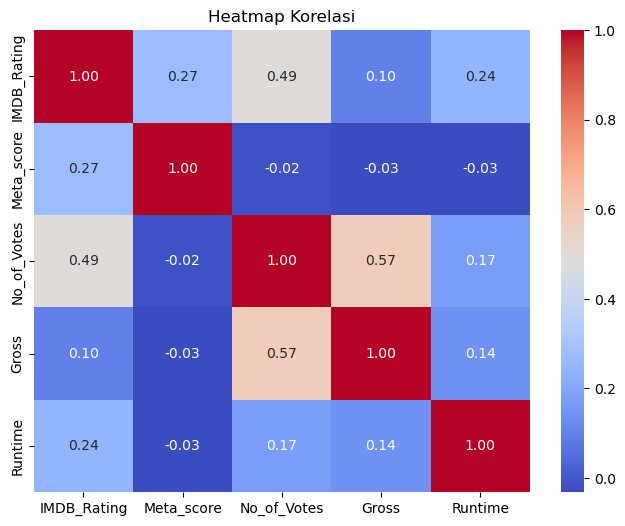

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

Dari visual Heatmap Korelasi ini menunjukkan bahwa
1. Korelasi antara No_of_Votes (angka vote) dengan Gross(angka penjualan) menunjukkan hubungan positif sedang.

2. Korelasi antara No_of_Votes (angka vote) dengan IMDB_Rating menunjukkan hubungan positif sedang.

3. Korelasi antara IMDB_Rating dengan 

In [176]:
#analisis popularitas data (kaisar)